N = 10
Max error: 2.7200464103316337e-16


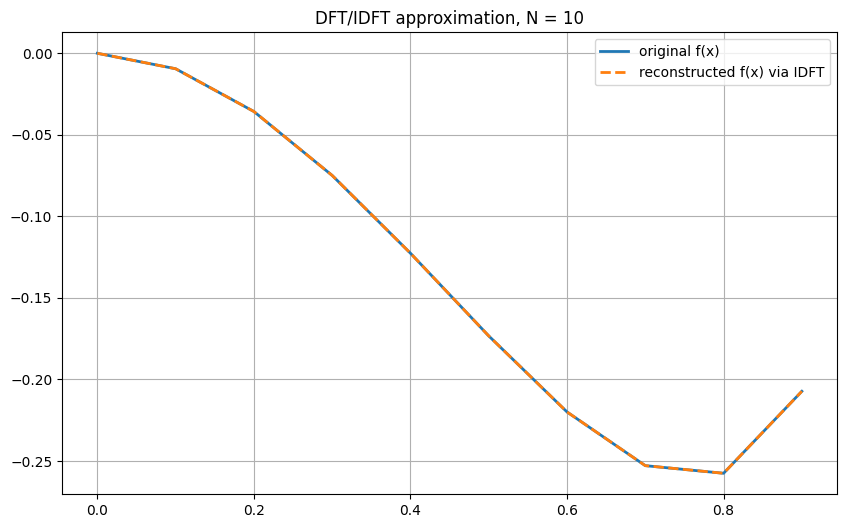

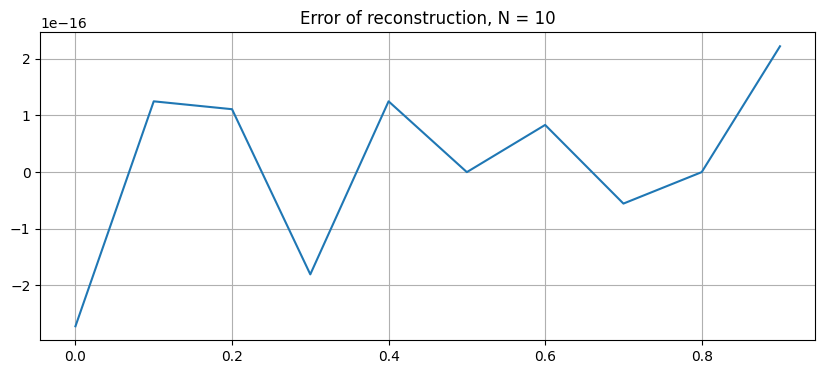

N = 50
Max error: 3.2152058793144534e-15


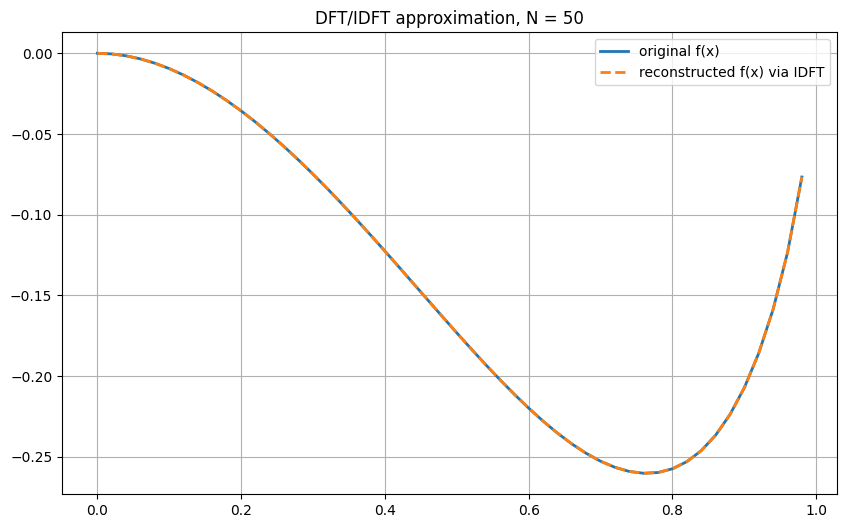

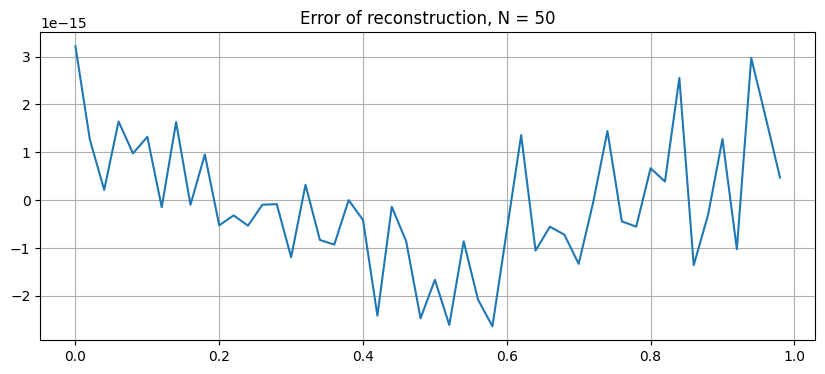

N = 100
Max error: 9.880984919163893e-15


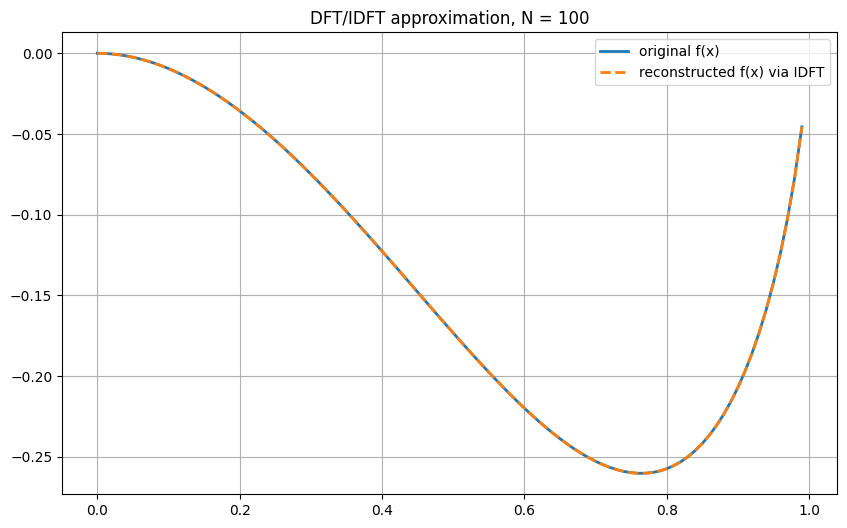

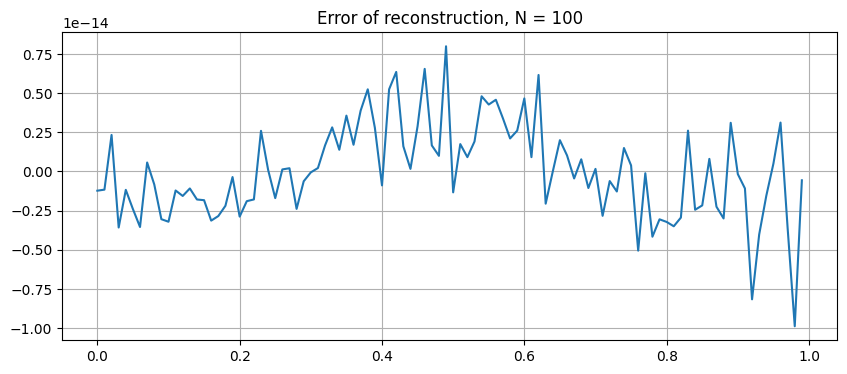

N = 1000
Max error: 9.767187059139815e-14


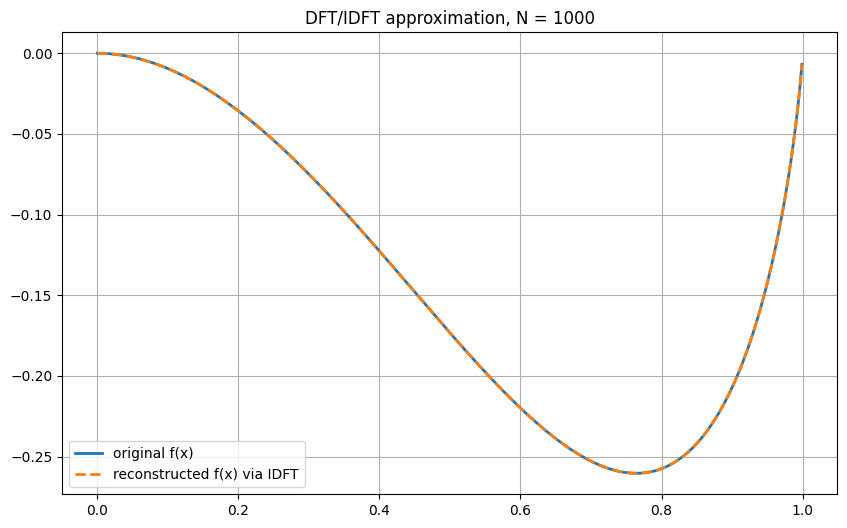

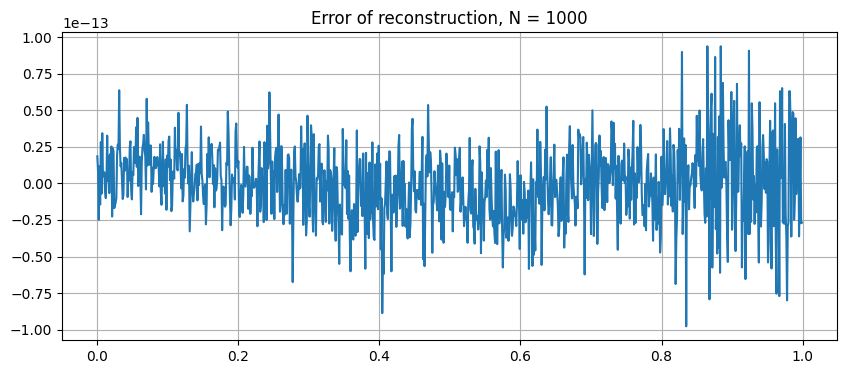

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    x = np.where(x == 1, 1 - 1e-12, x)
    return x * (1 - x) * np.log(1 - x)

def DFT(a):
    N = len(a)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, a)


def Inver_DFT(F):
    N = len(F)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(2j * np.pi * k * n / N)
    return np.dot(M, F).real / N


Ns = [10, 50, 100, 1000]
for N in Ns:
    print(f"N = {N}")

    x = np.linspace(0, 1, N, endpoint=False)
    f_vals = f(x)

    F = DFT(f_vals)
    f_rec = Inver_DFT(F)
    error = np.max(np.abs(f_vals - f_rec))
    print("Max error:", error)



    plt.figure(figsize=(10, 6))
    plt.plot(x, f_vals, label="original f(x)", linewidth=2)
    plt.plot(x, f_rec, "--", label="reconstructed f(x) via IDFT", linewidth=2)
    plt.title(f"DFT/IDFT approximation, N = {N}")
    plt.legend()
    plt.grid(True)
    plt.show()

    #Errors
    plt.figure(figsize=(10, 4))
    plt.plot(x, f_vals - f_rec, label="error f(x) - f_rec")
    plt.title(f"Error of reconstruction, N = {N}")
    plt.grid(True)
    plt.show()
